In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askdirectory
path = askdirectory(title='Select Folder') # shows dialog box and return the path
os.path.abspath(path)
files = glob.glob(os.path.join(path, "*.csv"))
path1 = os.path.basename(os.path.normpath(path))

dataframe_list = []
#note, for naming. The file (aggregate freq/amp, waveform) data should be pretty concise. The waveform by itself should be named plainly (like 0.5) because it will be in its own folder and analyzed
#waveform data should be aggregated together (like ratio) and put into one folder for the entire system. 
for path, dirs, files in os.walk(path):
    print("Path:", path)

    print ("\nDirs:")
    for d in dirs:
        print ('\t'+d)

    
        
    print ("\nFiles:")  


    for f in files:
        
        #filename = os.path.basename(f).split('.')[0] + "." + os.path.basename(f).split('.')[1]
        #strain = filename.split('-')[0].replace("%","")
        
        if(f.endswith('.csv')) :
            
            #NEED A WAY TO GET FREQUENCY
            fullfile = path +"/" +f#+".csv"
            if(fullfile.endswith('.csv')):
                pass
            else:
                fullfile += ".csv"
            fullfile = path +"/" +f#+".csv"
            print(fullfile)
            #data splitting
            name_data = f.split('_')
            wt_percent = int(name_data[0][0])
            raw_strain = float(name_data[1].replace(".csv", "").replace("xyz","0.1").replace("strain",""))
            
            
           #opendataframe
        
            dataframe1 = pd.read_csv(fullfile)
            dataframe1["strain"] = raw_strain
            dataframe1["wt_percent"] = wt_percent
            
            dataframe_list.append(dataframe1)
            print(dataframe1.size)
            
            
            

            
            #plotData(data1,name, n)
           
                


    
        
        
        
        
    print("Finished for loop")
       

        
        
    print ("----")
full_df = pd.concat(dataframe_list).reset_index()
print(full_df)


Path: C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2

Dirs:

Files:
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_100strain.csv
13208
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_10strain.csv
11592
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_30strain.csv
11776
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_40strain.csv
12096
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_63strain.csv
12048
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_80strain.csv
13024
C:/Users/Himendra Perera/Documents/ProjectCode/CO2Diff/ConfocalShearAnalysis/data/AmplitudeSweeps_PD2/1cda_xyz.csv
10336

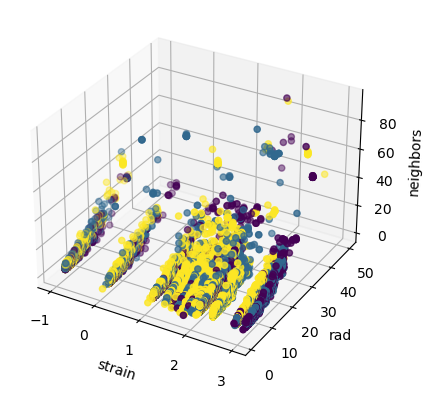

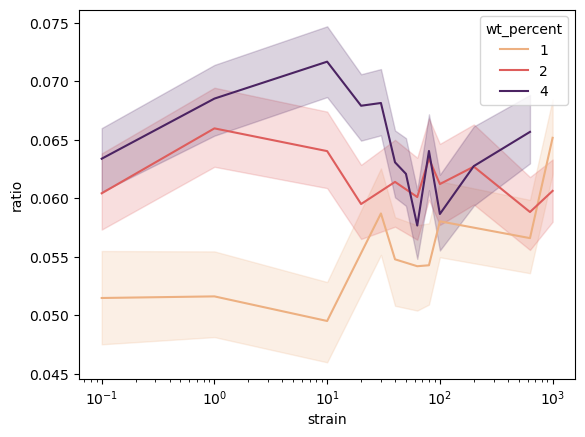

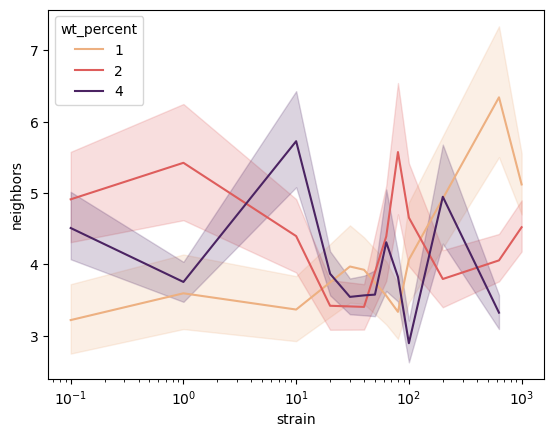

In [13]:
import matplotlib.colors as mcolors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
full_df = full_df[full_df["strain"]>0]
full_df = full_df[full_df["x"]<300]
full_df = full_df[full_df["x"]>50]

full_df = full_df[full_df["y"]<300]
full_df = full_df[full_df["y"]>50 ]

full_df = full_df[full_df["z"]>50]
full_df = full_df[full_df["z"]<150]

full_df = full_df[full_df["radius"]<50]

wts = full_df['wt_percent'].unique()







full_df['logstrain'] = np.log10(full_df['strain'])


plt.hist2d()


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(full_df["logstrain"] , full_df["radius"], full_df["neighbors"] , c = full_df["wt_percent"])

#X, Y = np.meshgrid(x_range, y_range)
#Z = Model.ev(X,Y)
#ax.plot_surface(X,Y,Z, color='red', alpha=0.5)

ax.set_xlabel('strain')
ax.set_ylabel('rad')
ax.set_zlabel('neighbors')
plt.show()

full_df["ratio"] = full_df["neighbors"]/full_df["radius"]**2
a1 = sns.lineplot(data = full_df, x = "strain", y = "ratio",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')



plt.show()

a1 = sns.lineplot(data = full_df, x = "strain", y = "neighbors",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')

plt.show()



